# Trabajo Final de Estadística 2018
- Autor: Emiliano López



## Hidrómetro

Resumen: En el siguiente análisis si estudian las mediciones de la altura del Río Paraná registradas por dos metodologías diferentes, las realizadas por Prefectura Naval observando la escala hidrométrica en forma manual del Puerto de Santa Fe, y las tomadas en forma automática por un dispositivo electrónico desarrollado en el CENtro de Estudios Hidroambientales (CENEHA) usando un distanciómetro acústico como sensor de nivel. 

### Lectura y Visualización

In [1]:
options(warn=-1)
datosRio = read.csv("datos/hidrometro/ceneha_vs_prefectura.csv", sep=";")
datosRio$FechayHora = as.POSIXct(datosRio$FechayHora, format = "%d/%m/%Y %H:%M")
#str(datosRio)
attach(datosRio)
#head(datosRio)

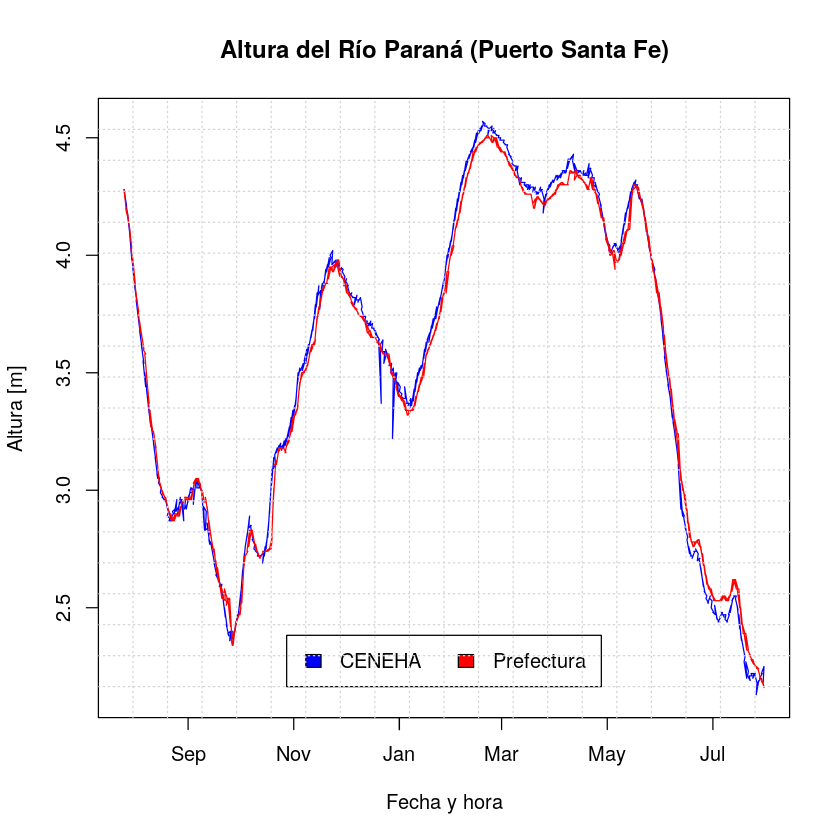

In [3]:
plot(FechayHora, AlturaCeneha, col="blue", main="Altura del Río Paraná (Puerto Santa Fe)",xlab="Fecha y hora", ylab="Altura [m]", type="lines")
lines(FechayHora, AlturaPrefectura,col="red")
legend("bottom", inset=.05, c("CENEHA","Prefectura"), fill=c("blue","red"), horiz=TRUE)
grid(nx = 20, ny = 20, col = "lightgray", lty = "dotted", lwd = par("lwd"), equilogs = TRUE)

### Modelo
- Usamos un modelo lineal: $Y = \beta_0 + \beta_1 X_t + \epsilon_t$

Donde:
- Desplazamiento: $\beta_0 = 0.153339$,  $SE=0.009352$
- Pendiente: $\beta_1 = 0.953815$, $SE=0.002592$

In [2]:
modeloRio = lm(AlturaPrefectura ~ AlturaCeneha)
summary(modeloRio)


Call:
lm(formula = AlturaPrefectura ~ AlturaCeneha)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.300628 -0.027215  0.000335  0.028950  0.275376 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.153339   0.009352    16.4   <2e-16 ***
AlturaCeneha 0.953815   0.002592   368.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0484 on 727 degrees of freedom
Multiple R-squared:  0.9947,	Adjusted R-squared:  0.9947 
F-statistic: 1.355e+05 on 1 and 727 DF,  p-value: < 2.2e-16


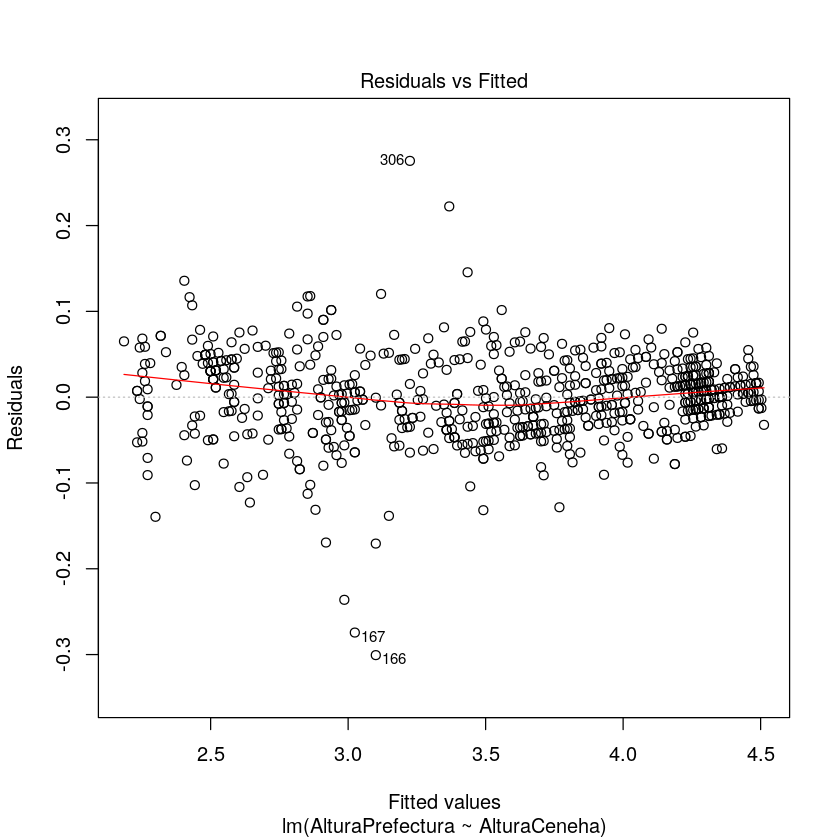

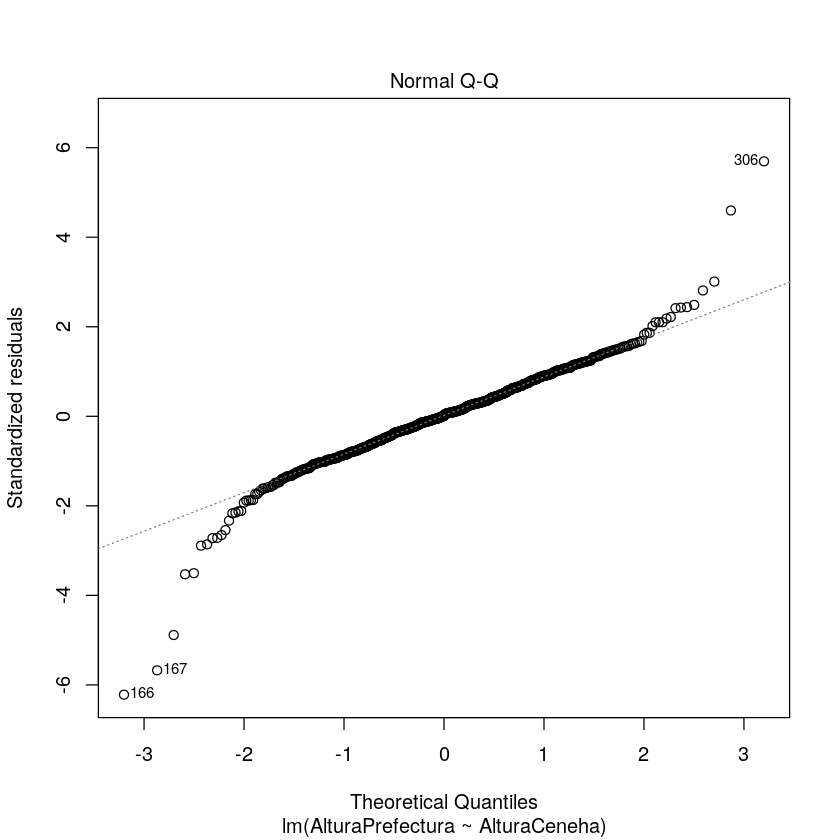

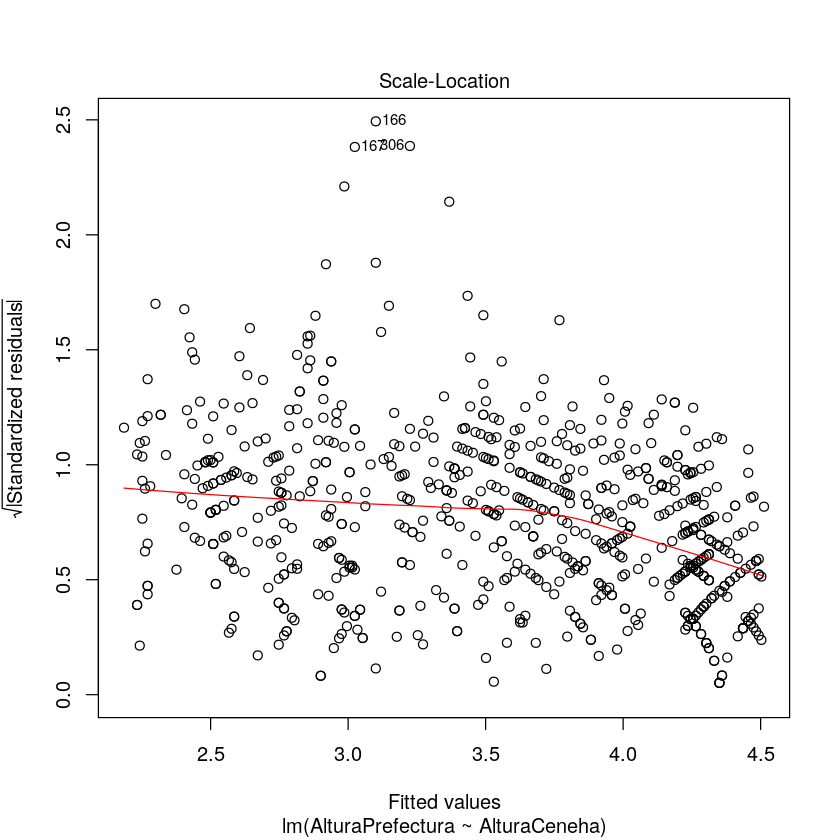

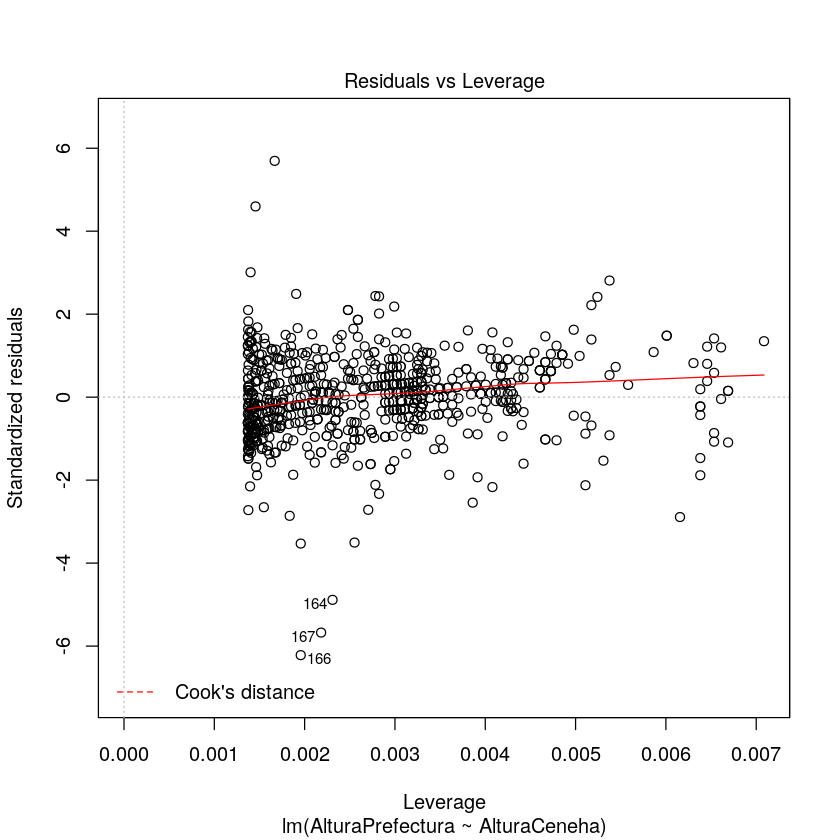

In [3]:
plot(modeloRio)

El ajuste de este modelo de regresión lineal nos queda:

$$E(Y_t|X_t) = 0.153339 + 0.953815 X_t$$

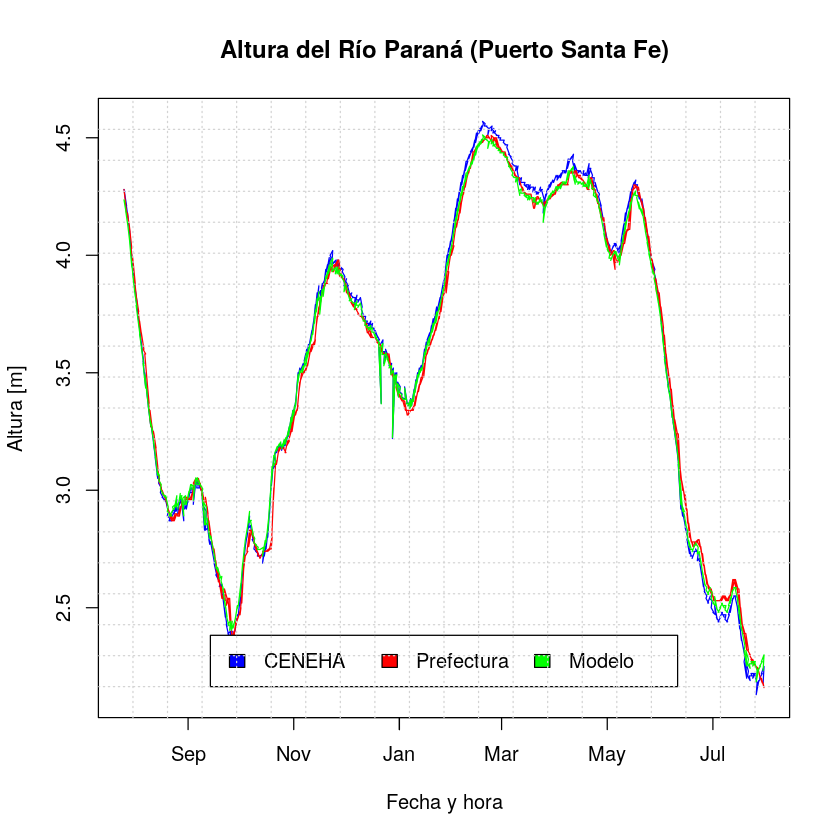

In [5]:
plot(FechayHora, AlturaCeneha, col="blue", main="Altura del Río Paraná (Puerto Santa Fe)",xlab="Fecha y hora", ylab="Altura [m]", type="lines")
lines(FechayHora, AlturaPrefectura,col="red")
legend("bottom", inset=.05, c("CENEHA","Prefectura", "Modelo"), fill=c("blue","red", "green"), horiz=TRUE)
grid(nx = 20, ny = 20, col = "lightgray", lty = "dotted", lwd = par("lwd"), equilogs = TRUE)

# superponemos el modelo
lines(FechayHora, modeloRio$fitted.values, col='green')

### Outliers
- Corregimos valores anómalos

     rstudent unadjusted p-value Bonferonni p
166 -7.731469         3.5511e-14   2.5888e-11
167 -5.949642         4.1787e-09   3.0463e-06
164 -5.086952         4.6372e-07   3.3805e-04

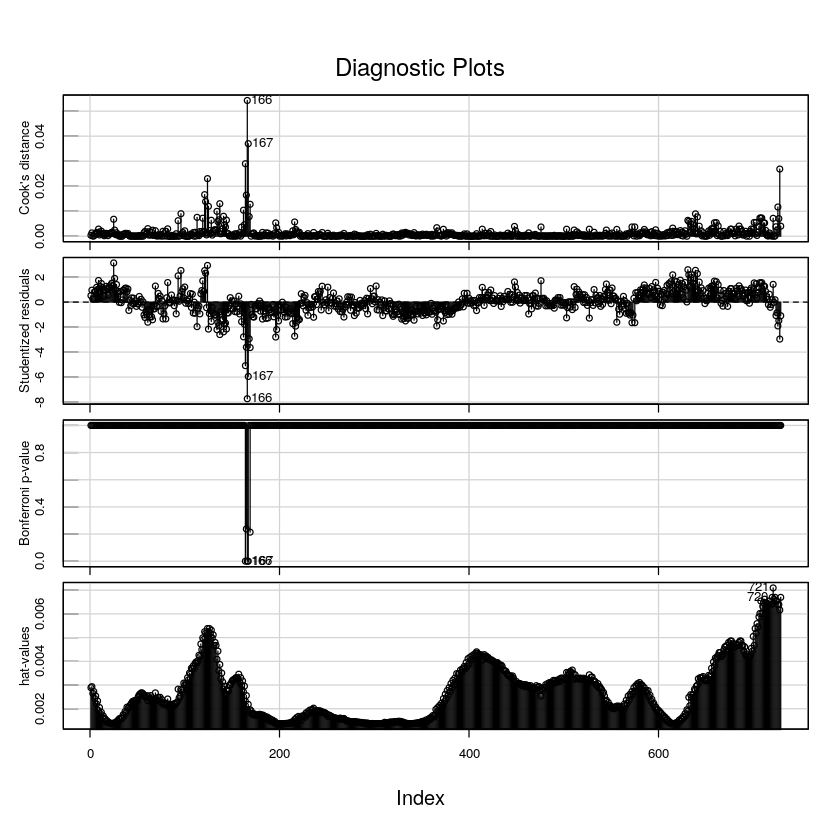

In [12]:
library(car)

# Reemplazo los outliers por el promedio de sus valores vecinos que están correctos

AlturaCeneha[291] = (AlturaCeneha[290] + AlturaCeneha[292])/2.0
AlturaCeneha[306] = (AlturaCeneha[305] + AlturaCeneha[307])/2
AlturaPrefectura[166] = (AlturaPrefectura[167] + AlturaPrefectura[165])/2

modeloRio = lm(AlturaPrefectura ~ AlturaCeneha)

outlierTest(modeloRio)
influenceIndexPlot(modeloRio)

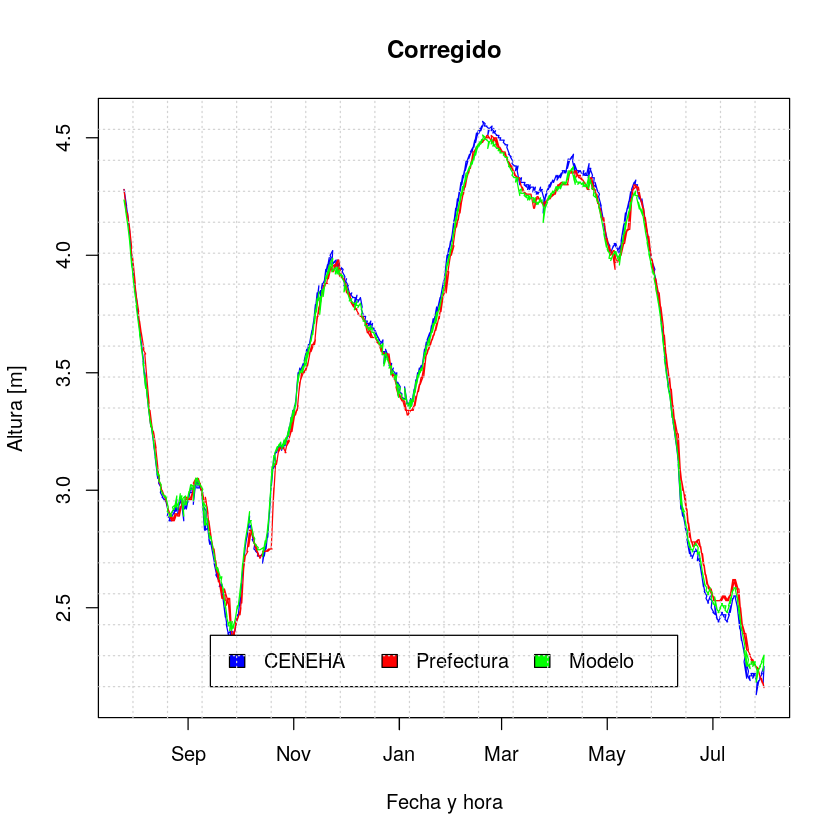

In [26]:
plot(FechayHora, AlturaCeneha, col="blue", main="Corregido",xlab="Fecha y hora", ylab="Altura [m]", type="lines")
lines(FechayHora, AlturaPrefectura,col="red")
legend("bottom", inset=.05, c("CENEHA","Prefectura", "Modelo"), fill=c("blue","red", "green"), horiz=TRUE)
grid(nx = 20, ny = 20, col = "lightgray", lty = "dotted", lwd = par("lwd"), equilogs = TRUE)

# superponemos el modelo
lines(FechayHora, modeloRio$fitted.values, col='green')

### Supuestos del modelo
- **Normalidad**

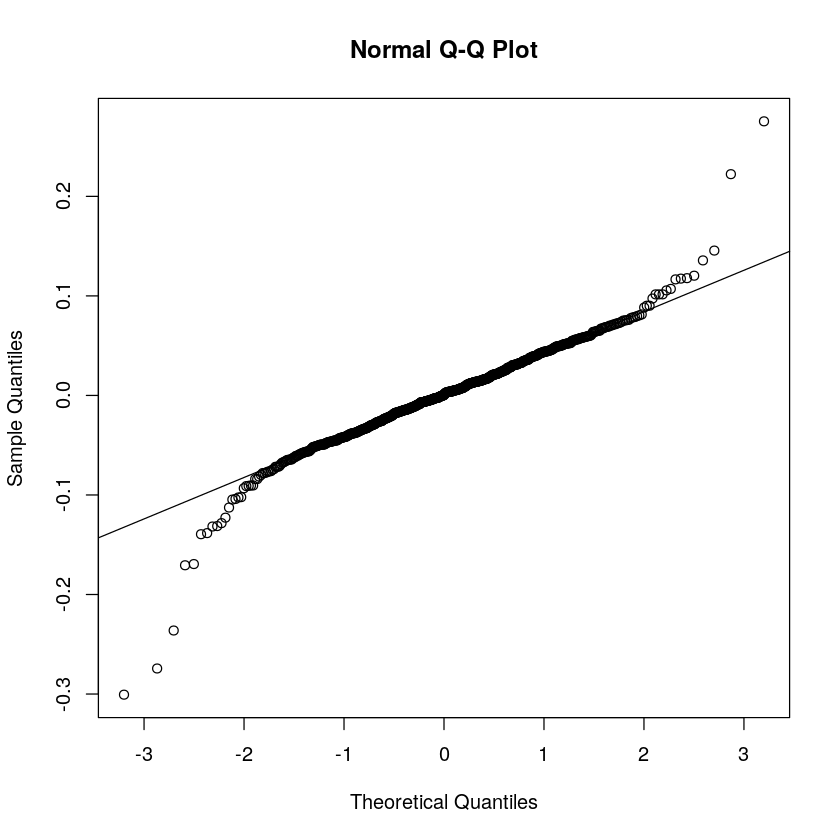

In [7]:
qqnorm(modeloRio$residuals)
qqline(modeloRio$residuals)

- **Varianza constante:** parecería que para este caso no funciona el leveneTest, sin embargo si probamos con ncvTest nos da un pvalor muy pequeño. ¿Corresponde analizar las varianzas acá? porque no tenemos diferentes tratamientos.

In [8]:
ncvTest(modeloRio)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 79.97045, Df = 1, p = < 2.22e-16

- **Independencia de los residuos**

    - Veremos que no es posible asegurar la independencia de los errores
    - Cada valor es dependiente del anterior
    
#### Gráfico de rachas 

Como los datos han sido colectados a través del tiempo puede ocurrir una correlación serial. Graficando los residuos vs el orden temporal en el que los datos fuerfon colectados podemos evaluar los patrones. En patrón que se observará muestra una correlación serial positiva en la cual los residuos tienden a seguirse en el tiempo por residuos del mismo signo y de aproximadamente el mismo tamaño, de aquí que se lo demonina rachas. Vemos que hay rachas lejos de la media 0, por encima y otras por debajo.

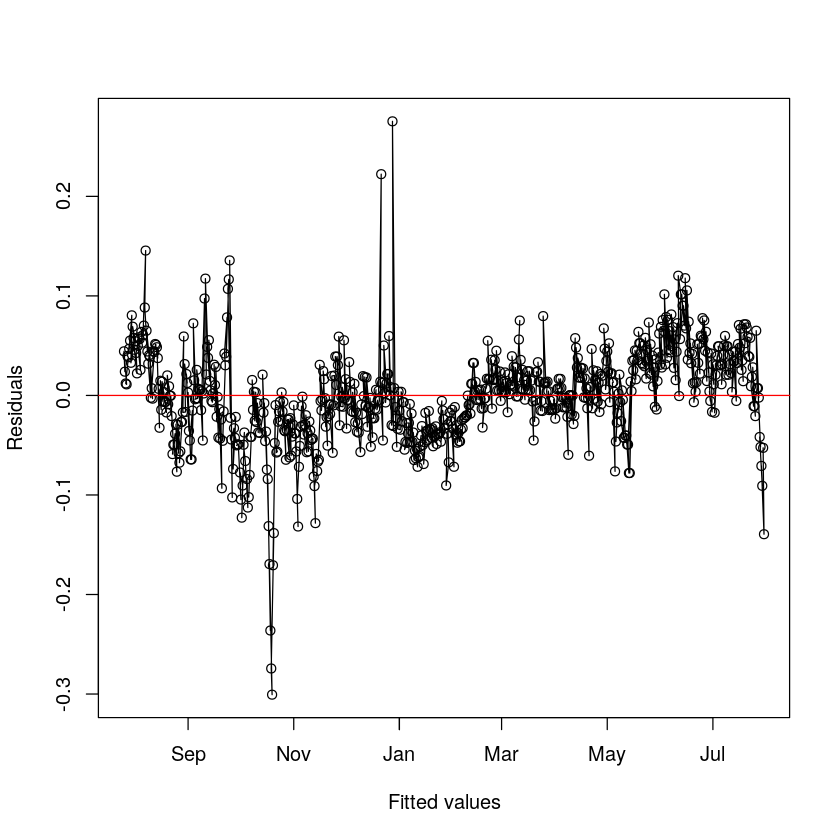

In [9]:
plot(FechayHora, modeloRio$residuals, type='o',  ylab = 'Residuals', xlab = 'Fitted values',)
abline(h=0,col='red')

#### Gráfico de residuos adyacentes

Como la mayoria de los puentos están en el primer y tercer cuadrante: **correlacion serial presente**. El valor del desvío en un punto es similar al del punto mas reciente en el tiempo. 

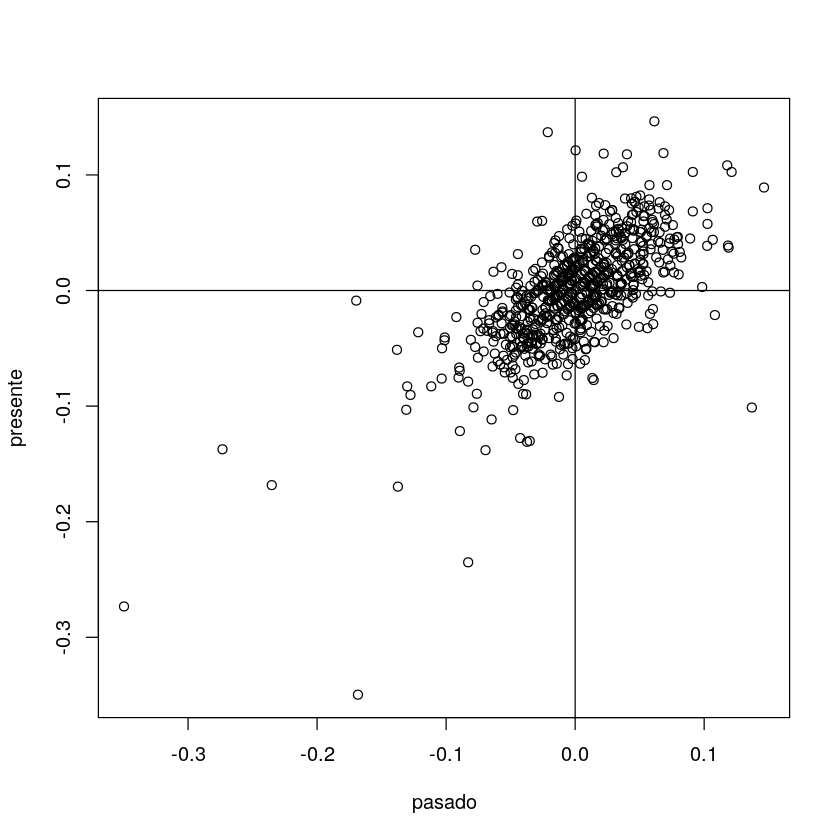

In [15]:
n = length(AlturaCeneha)
residuos = modeloRio$residuals
pasado = residuos[-n]   # elimina el último
presente = residuos[-1] # elimina el primero
plot(presente~pasado)
abline(h = 0, v = 0)

### Estimamos el primer coeficiente de correlación serial (autocorrelación)

- H0: $\alpha = 0$
- H1: $\alpha \neq 0$

Ahora $\alpha$ será aproximado por el coeficiente de correlación serial $$r1 = c1/c0$$, que es similar a la pendiente de la recta en la regresión.

- Si r1 = 0 no existe correlación serial y por lo tanto el factor de ajuste es 1;
- Si r1 > 0 el factor de ajuste es más grande que 1;
- Si r1 = 0 el factor de ajuste es más chico que 1;

In [16]:
s = length(residuos)
c1 = sum(presente*pasado)/(n-1)
c0 = sum(presente^2)/(n-1)
r1 = c1/c0
abs(r1*sqrt(s))>qnorm(1-0.05/2)

[1] TRUE

**Como me da verdadero entonces el coeficiente de correlacion es no nulo y sostengo que hay correlacion entre los datos y hago filtering**

### Regresión con variables filtradas

Crear nuevas variables respuestas y explicativas tales que el coeficiente de regresión sea el mismo pero que los residuos sean independientes

In [17]:
V = AlturaPrefectura[2:s] - r1 * AlturaPrefectura[1:(s-1)]
U = AlturaCeneha[2:s] -r1*AlturaCeneha[1:(s-1)]
modeloF = lm(V~U)
summary(modeloF)


Call:
lm(formula = V ~ U)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.235479 -0.019059  0.000787  0.021110  0.149088 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.055075   0.006563   8.392 2.49e-16 ***
U           0.948482   0.005658 167.650  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03456 on 726 degrees of freedom
Multiple R-squared:  0.9748,	Adjusted R-squared:  0.9748 
F-statistic: 2.811e+04 on 1 and 726 DF,  p-value: < 2.2e-16


**Estudiamos los residuos del modelo filtrado**

null device 
          1

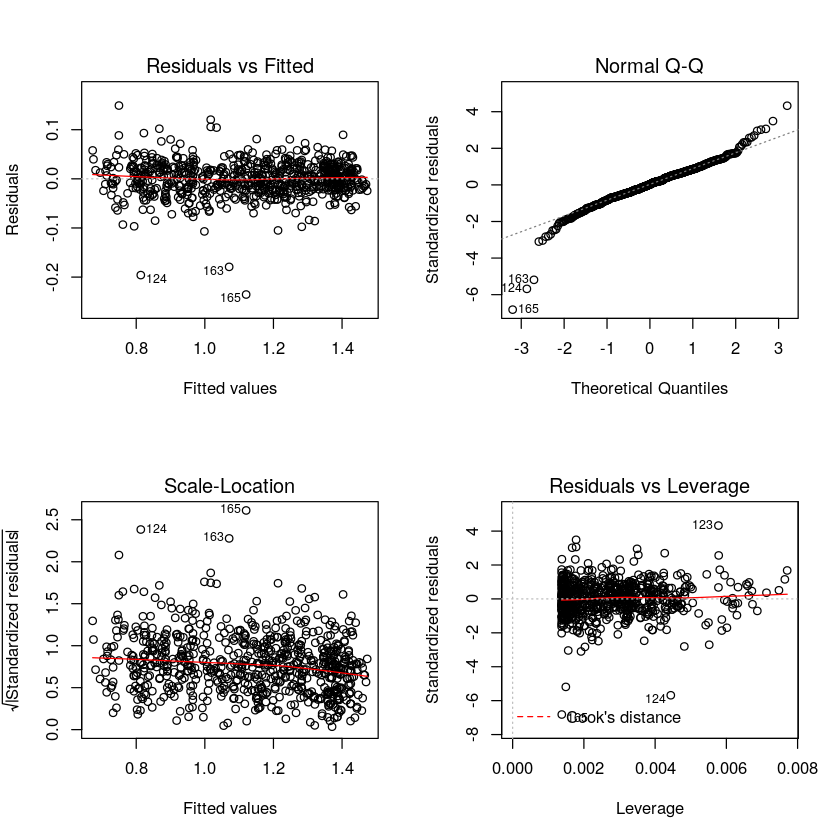

In [18]:
par(mfrow=c(2,2))
plot(modeloF)
dev.off()

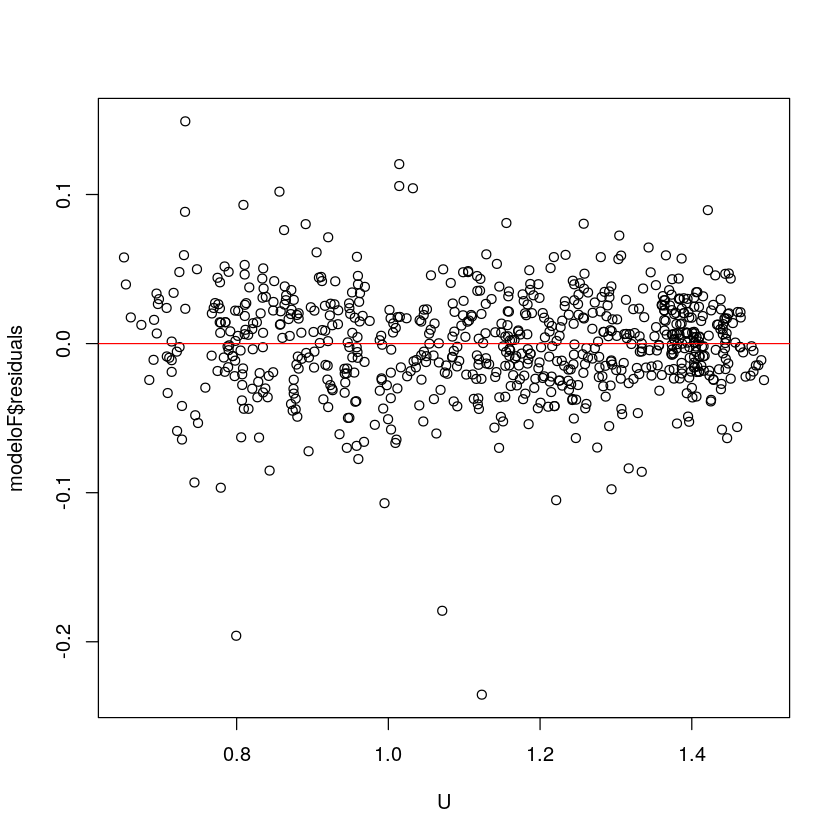

In [19]:
plot(U, modeloF$residuals)
#lines(U,modeloF$residuals)
abline(h=0,col='red')

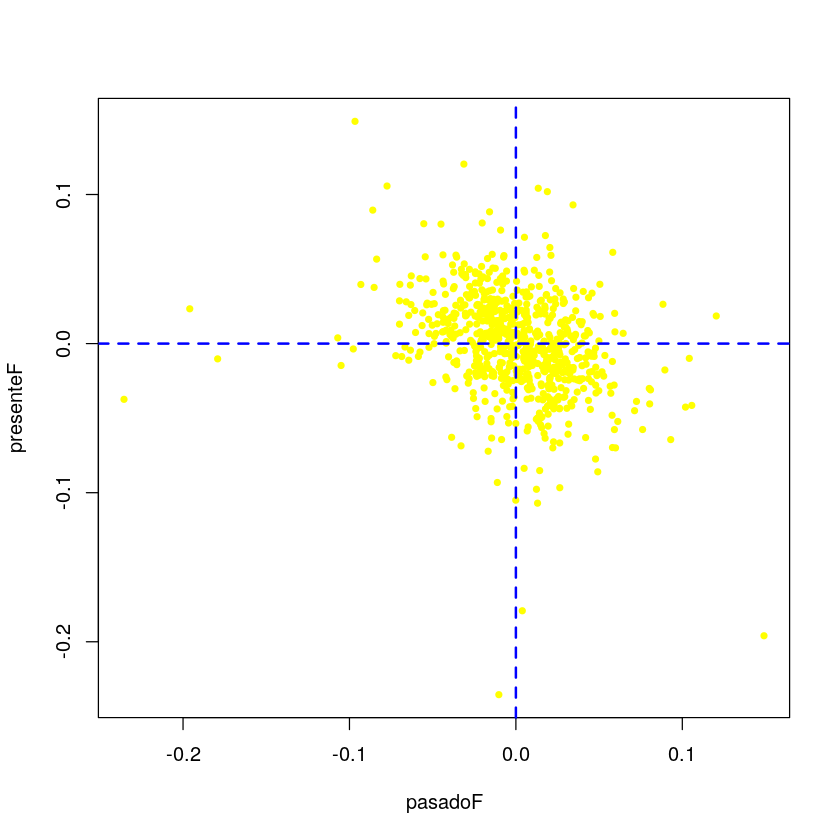

In [21]:
#comparo el presente vs el pasado
residuosF = modeloF$residuals
sF = length(residuosF)
pasadoF = residuosF[1:(sF-1)]
presenteF=residuosF[2:(sF)]

plot(presenteF~pasadoF,col='yellow',pch=20)
abline(h=0,v=0,col='blue',lwd=2,lty=2)

In [24]:
#hipotesis de que hay correlacion
c1F=1/(sF-1)*sum(presenteF*pasadoF)
c0F=1/(sF-1)*sum(residuosF^2)

r1F=c1F/c0F

#testeo si r1 es 0 o no, 
# es no 0 si es es TRUE
abs(r1F*sqrt(sF))>qnorm(1-0.05/2)

# otro test podría ser este
#library("randtests")
#runs.test(residuosF)

[1] TRUE

**Debemos volver a hacer un filtrado porque aun no eliminamos la independencia**


Call:
lm(formula = V2 ~ U2)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.238485 -0.017065 -0.000023  0.018988  0.118935 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.068318   0.006250   10.93   <2e-16 ***
U2          0.951702   0.004053  234.82   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03261 on 725 degrees of freedom
Multiple R-squared:  0.987,	Adjusted R-squared:  0.987 
F-statistic: 5.514e+04 on 1 and 725 DF,  p-value: < 2.2e-16


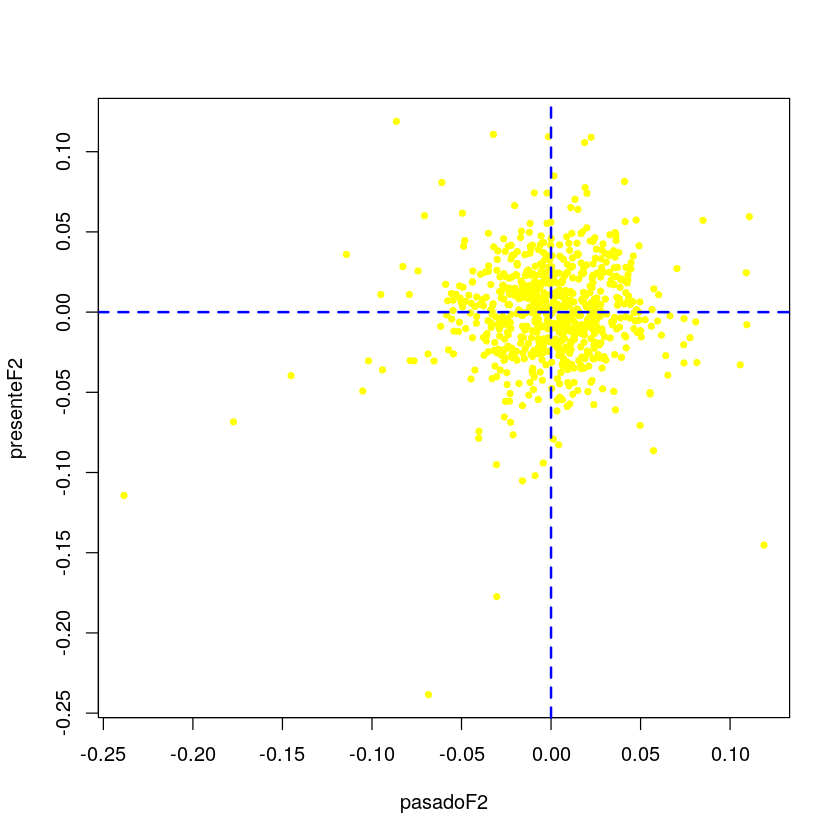

In [36]:
V2 = V[2:sF] - r1F * V[1:(sF-1)]
U2 = U[2:sF] - r1F * U[1:(sF-1)]

modeloF2 = lm(V2~U2)
summary(modeloF2)

#comparo el presente vs el pasado
residuosF2 = modeloF2$residuals
sF2 = length(residuosF2)
pasadoF2 = residuosF2[1:(sF2-1)]
presenteF2=residuosF2[2:(sF2)]

plot(presenteF2~pasadoF2,col='yellow',pch=20)
abline(h=0,v=0,col='blue',lwd=2,lty=2)

In [38]:
#hipotesis de que hay correlacion
c1F2=1/(sF2-1)*sum(presenteF2*pasadoF2)
c0F2=1/(sF2-1)*sum(residuosF2^2)

r1F2=c1F2/c0F2

#testeo si r1 es 0 o no, 
# es no 0 si es es TRUE
abs(r1F2*sqrt(sF2))>qnorm(1-0.05/2)

[1] TRUE


	Runs Test

data:  residuosF
statistic = 8.6044, runs = 481, n1 = 364, n2 = 364, n = 728, p-value <
2.2e-16
alternative hypothesis: nonrandomness



Call:
lm(formula = V3 ~ U3)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.233101 -0.018237  0.000429  0.019309  0.125483 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.063789   0.006227   10.24   <2e-16 ***
U3          0.951060   0.004388  216.75   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03253 on 724 degrees of freedom
Multiple R-squared:  0.9848,	Adjusted R-squared:  0.9848 
F-statistic: 4.698e+04 on 1 and 724 DF,  p-value: < 2.2e-16


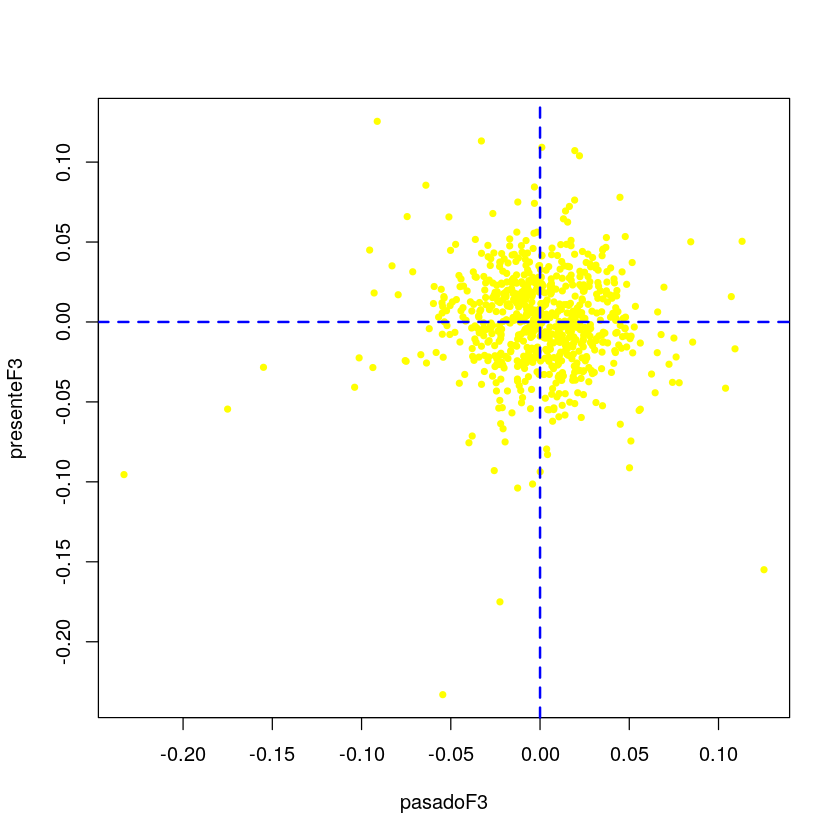

In [43]:
# 3er filtrado

V3 = V2[2:sF2] - r1F2 * V2[1:(sF2-1)]
U3 = U2[2:sF2] - r1F2 * U2[1:(sF2-1)]

modeloF3 = lm(V3~U3)
summary(modeloF3)
#comparo el presente vs el pasado
residuosF3 = modeloF3$residuals
sF3 = length(residuosF3)

pasadoF3 = residuosF3[1:(sF3-1)]
presenteF3=residuosF3[2:(sF3)]

plot(presenteF3~pasadoF3,col='yellow',pch=20)
abline(h=0,v=0,col='blue',lwd=2,lty=2)

In [41]:
#hipotesis de que hay correlacion
c1F3=1/(sF3-1)*sum(presenteF3*pasadoF3)
c0F3=1/(sF3-1)*sum(residuosF3^2)

r1F3=c1F3/c0F3

#testeo si r1 es 0 o no, 
# es no 0 si es es TRUE
abs(r1F3*sqrt(sF3))>qnorm(1-0.05/2)

[1] FALSE


- <font color='red'>EL RESULTADO PREVIO (FALSE) NOS INDICA QUE NOS HEMOS LIBERADO DE LA DEPENDENCIA TEMPORAL</font>

- <font color='red'>Resta construir el Intervalo de Confianza para corroborar si se acepta o rechaza el siguiente test</font>


*** 

- H0: $\beta_1 = 1$
- H1: $\beta_1 \neq 1$

- <font color='red'>A continuación observamos el IC, que contiene al 1, por lo que podemos asumir cono válida y aceptar la H0.</font>

In [46]:
c(0.951060 - qt(1-0.05/2,sF3-2), 0.951060 + qt(1-0.05/2,sF3-2))

[1] -1.012186  2.914306

## Humedad ambiente

Resumen: en el siguiente trabajo se analizan la temperatura y humedad ambiente, ambas registradas con dos equipos diferentes. Por un lado por los sensores provistos por una estación Eddy Covariance de Campbell Scientific y por el otro, con el sensor DHT22. Los valores registrados por la estación son los tomados como verdaderos, ya que es un equipo profesional y muy utilizado para fines científicos.  El sensor DH22 es un sensor muy económico del que se pretendende evaluar la confiabilidad de sus mediciones. 

In [90]:
rm(list=ls())
datosHT = read.csv("datos/dht_eddyCovariance/dht_vs_eddy.csv", sep=";")
datosHT$FechayHora = as.POSIXct(datosHT$FechayHora, format = "%d/%m/%Y %H:%M")
#str(datosHT)
attach(datosHT)
head(datosHT)

The following objects are masked from datosHT (pos = 3):

    FechayHora, Humedad.DHT, Humedad.Eddy, Temperatura.DHT,
    Temperatura.Eddy

The following objects are masked from datosHT (pos = 4):

    FechayHora, Humedad.DHT, Humedad.Eddy, Temperatura.DHT,
    Temperatura.Eddy

The following objects are masked from datosHT (pos = 5):

    FechayHora, Humedad.DHT, Humedad.Eddy, Temperatura.DHT,
    Temperatura.Eddy

The following objects are masked from datosHT (pos = 6):

    FechayHora, Humedad.DHT, Humedad.Eddy, Temperatura.DHT,
    Temperatura.Eddy

The following objects are masked from datosHT (pos = 7):

    FechayHora, Humedad.DHT, Humedad.Eddy, Temperatura.DHT,
    Temperatura.Eddy

The following objects are masked from datosHT (pos = 8):

    FechayHora, Humedad.DHT, Humedad.Eddy, Temperatura.DHT,
    Temperatura.Eddy

The following objects are masked from datosHT (pos = 9):

    FechayHora, Humedad.DHT, Humedad.Eddy, Temperatura.DHT,
    Temperatura.Eddy

The following object

FechayHora,Temperatura.DHT,Humedad.DHT,Temperatura.Eddy,Humedad.Eddy
2014-12-29 10:45:00,29.1,72.3,28.10,63.05
2014-12-29 11:00:00,29.3,73.6,28.09,63.25
2014-12-29 11:15:00,29.4,69.0,28.43,60.17
2014-12-29 11:30:00,29.8,68.8,28.50,59.70
2014-12-29 11:45:00,30.2,65.4,29.04,57.51
2014-12-29 12:00:00,30.1,65.1,29.04,55.13


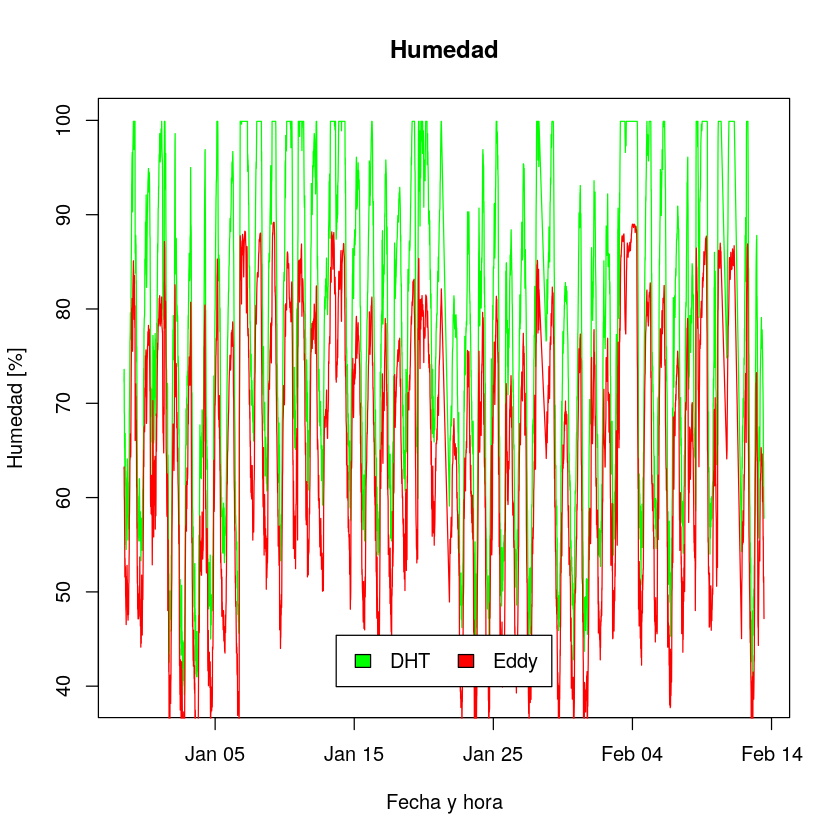

In [91]:
Humedad.DHT = 1*(Humedad.DHT)
plot(FechayHora, Humedad.DHT, col="green", main="Humedad", xlab="Fecha y hora", ylab="Humedad [%]", type="lines")
lines(FechayHora, Humedad.Eddy,col="red")
legend("bottom", inset=.05, c("DHT","Eddy"), fill=c("green","red"), horiz=TRUE)

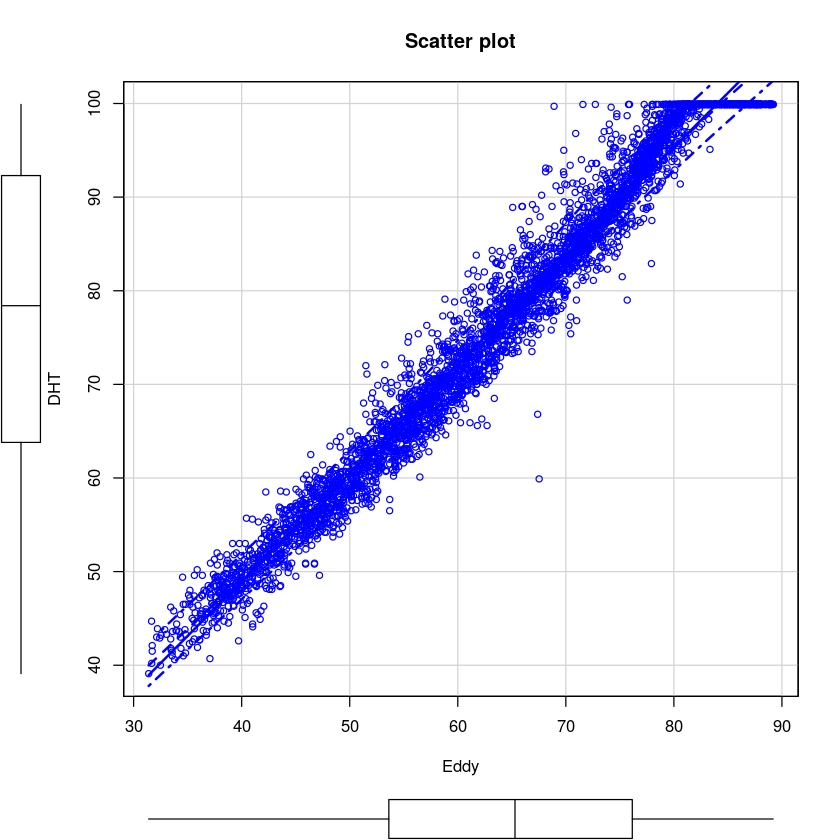

In [77]:
library(car)
scatterplot(Humedad.DHT ~ Humedad.Eddy, data=datosHT, xlab="Eddy", ylab="DHT", main="Scatter plot") 

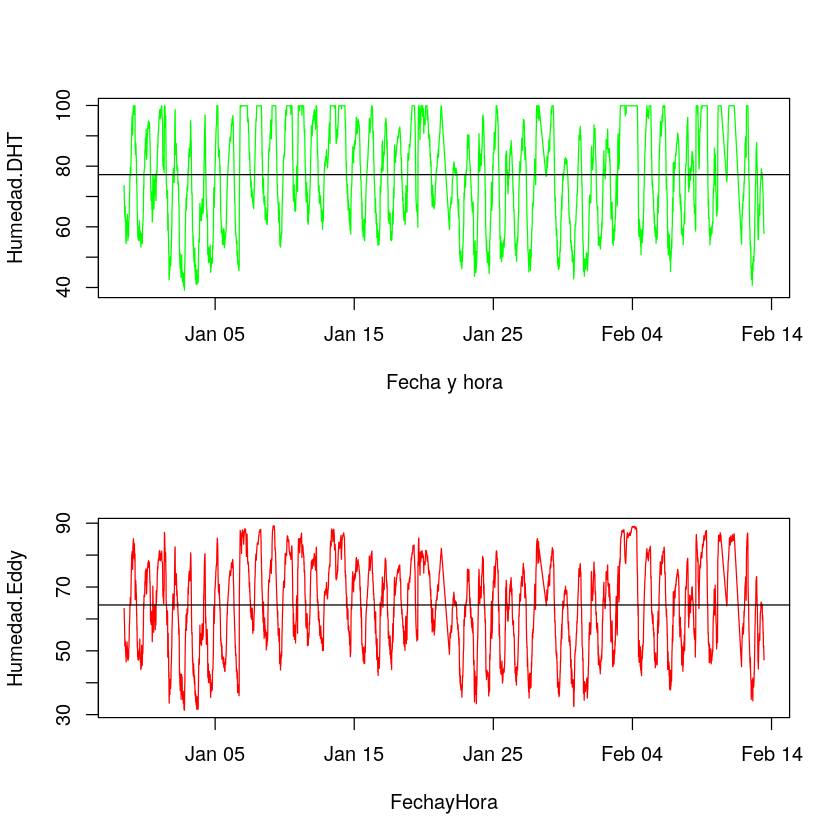

In [92]:
par(mfrow = c(2,1))
plot(Humedad.DHT~FechayHora, col="green", xlab="Fecha y hora", type="l")
abline(h = mean(Humedad.DHT), v = 0,col='black')
plot(Humedad.Eddy~FechayHora,col="red", type="lines")
abline(h = mean(Humedad.Eddy), v = 0,col='black')

In [93]:
modeloHEddy = lm(Humedad.Eddy ~ FechayHora)
summary(modeloHEddy)


Call:
lm(formula = Humedad.Eddy ~ FechayHora)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.885 -10.754   0.917  11.801  24.882 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -2.201e+01  2.709e+02  -0.081    0.935
FechayHora   6.076e-08  1.905e-07   0.319    0.750

Residual standard error: 14.12 on 4216 degrees of freedom
Multiple R-squared:  2.412e-05,	Adjusted R-squared:  -0.0002131 
F-statistic: 0.1017 on 1 and 4216 DF,  p-value: 0.7498


In [94]:
modeloHDHT = lm(Humedad.DHT ~ FechayHora)
summary(modeloHDHT)


Call:
lm(formula = Humedad.DHT ~ FechayHora)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.631 -13.515   1.133  15.108  23.263 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -3.452e+02  3.186e+02  -1.084    0.279
FechayHora   2.971e-07  2.241e-07   1.326    0.185

Residual standard error: 16.61 on 4216 degrees of freedom
Multiple R-squared:  0.0004168,	Adjusted R-squared:  0.0001797 
F-statistic: 1.758 on 1 and 4216 DF,  p-value: 0.185


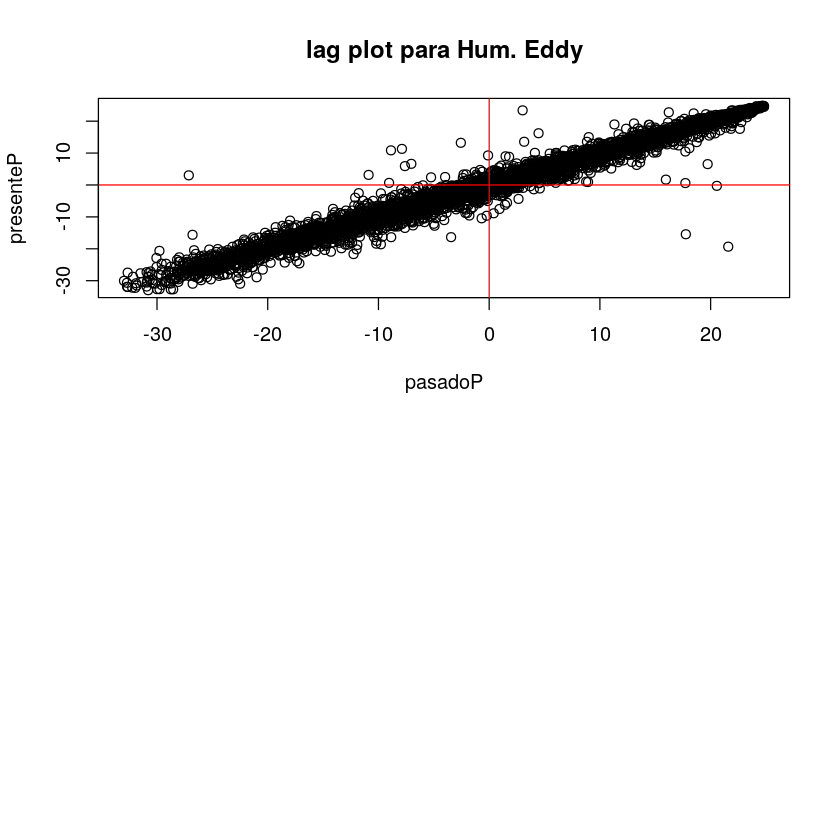

In [95]:
nP = length(Humedad.Eddy)
par(mfrow = c(2,1))
resP = Humedad.Eddy-mean(Humedad.Eddy)
pasadoP = resP[-nP]
presenteP = resP[-1]
plot(presenteP~pasadoP, main = 'lag plot para Hum. Eddy')
# agrego los ejes
abline(h = 0, v = 0,col='red')

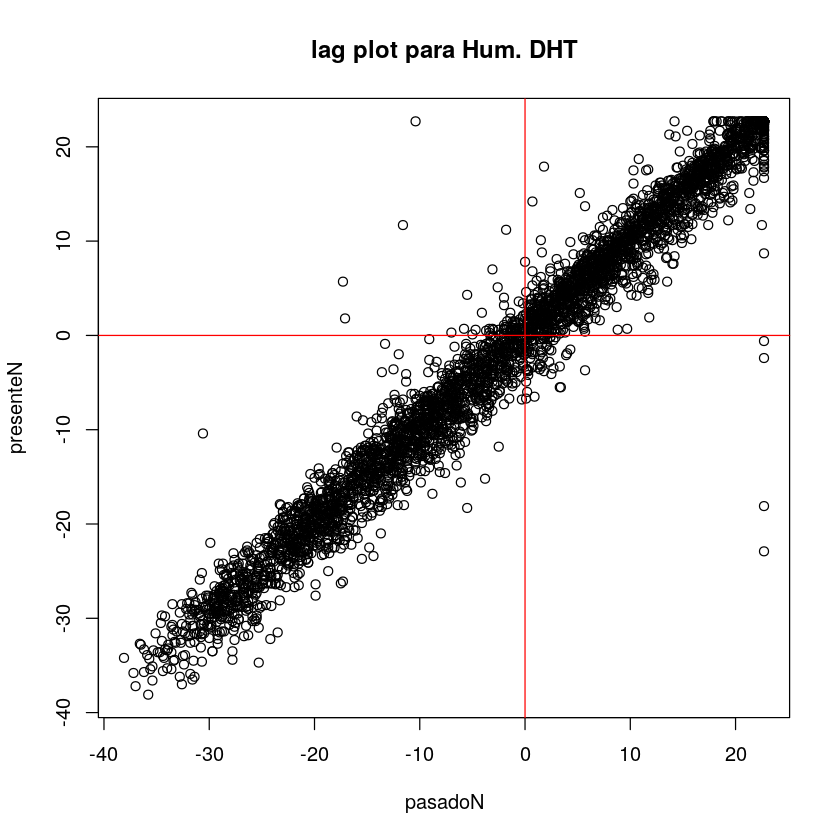

In [96]:
nN = length(Humedad.DHT)
resN = Humedad.DHT-mean(Humedad.DHT)
pasadoN = resN[-nN]
presenteN = resN[-1]
plot(presenteN~pasadoN, main = 'lag plot para Hum. DHT')
# agrego los ejes
abline(h = 0, v = 0,col='red')

In [97]:
c1P = sum(presenteP*pasadoP)/(nP-1)
c0P = sum(resP^2)/(nP-1)
c1N = sum(presenteN*pasadoN)/(nN-1)
c0N = sum(resN^2)/(nN-1)
# los estimadores combinados
c1 = ((nP-1)*c1P + (nN-1)*c1N)/(nP+nN-2)
c0 = ((nP-1)*c0P + (nN-1)*c0N)/(nP+nN-2)
# estimacion del alpha:
(r1 = c1/c0)

[1] 0.986071

In [99]:
sp = sqrt(((nP-1)*var(Humedad.Eddy) + (nN-1)*var(Humedad.DHT))/(nP+nN-2))
correc = sqrt((1+r1)/(1-r1))
# error estandar corregido:
SE = correc*sp*sqrt(1/nP + 1/nN)
dif = mean(Humedad.Eddy) - mean(Humedad.DHT)
z = qnorm(1-0.05/2)
c(dif-z*SE, dif+z*SE)
# como el itervalo de confianza para la diferencia de medias contiene al
# cero, no tenemos evidencia suficiente para afirmar que las medias
# son distintas

[1] -20.684087  -4.971055

In [89]:
# f) Que pasa si no tengo en cuenta la correlacion??
t.test(Humedad.Eddy,Humedad.DHT,var.equal=TRUE)
SE = sp*sqrt(1/nP + 1/nN)
t=qt(1-.05/2,nP+nN-2)
c(dif-t*SE, dif+t*SE)
# IC: (-0.303482438814808 0.0491486313231033)
# este intervalo tiene menor longitud que el intervalo corregido por correlacion
# esto se debe a que el factor de ajuste es 
# 2.149401, el cual es > 1, por lo que el IC del item anterior tiene
# mayor longitud


	Two Sample t-test

data:  Humedad.Eddy and Humedad.DHT
t = -3.9547, df = 8434, p-value = 7.726e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.9856143 -0.6695279
sample estimates:
mean of x mean of y 
 64.37025  65.69782 


[1] -1.9856143 -0.6695279

## Temperatura ambiente

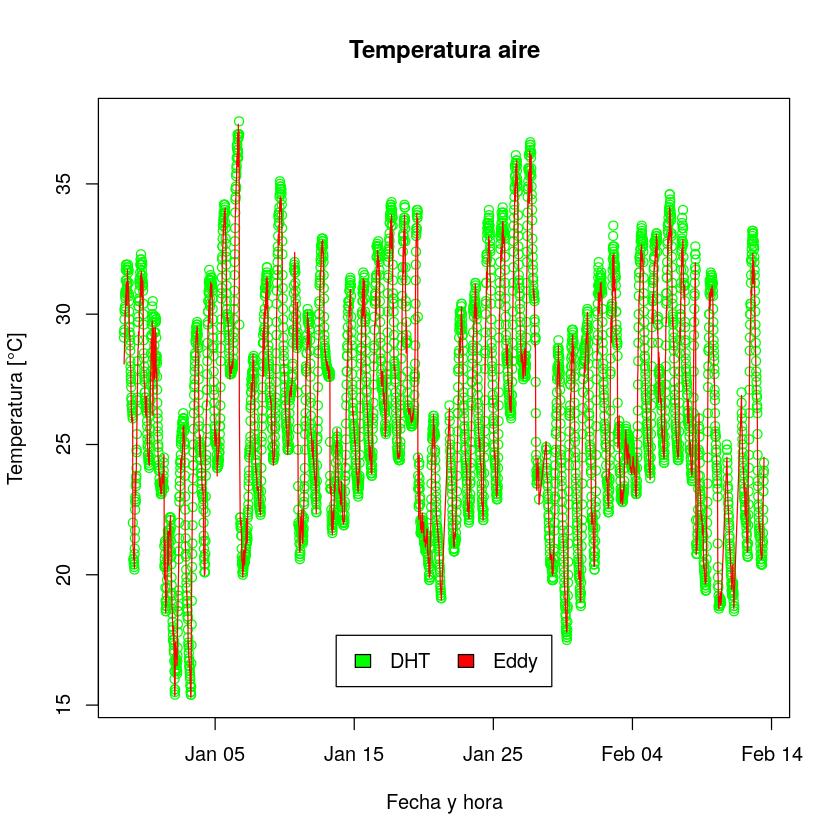

In [19]:
plot(FechayHora, Temperatura.DHT, col="green", main="Temperatura aire", 
     xlab="Fecha y hora", ylab="Temperatura [°C]")

lines(FechayHora, Temperatura.Eddy,col="red")
legend("bottom", inset=.05, c("DHT","Eddy"), fill=c("green","red"), horiz=TRUE)

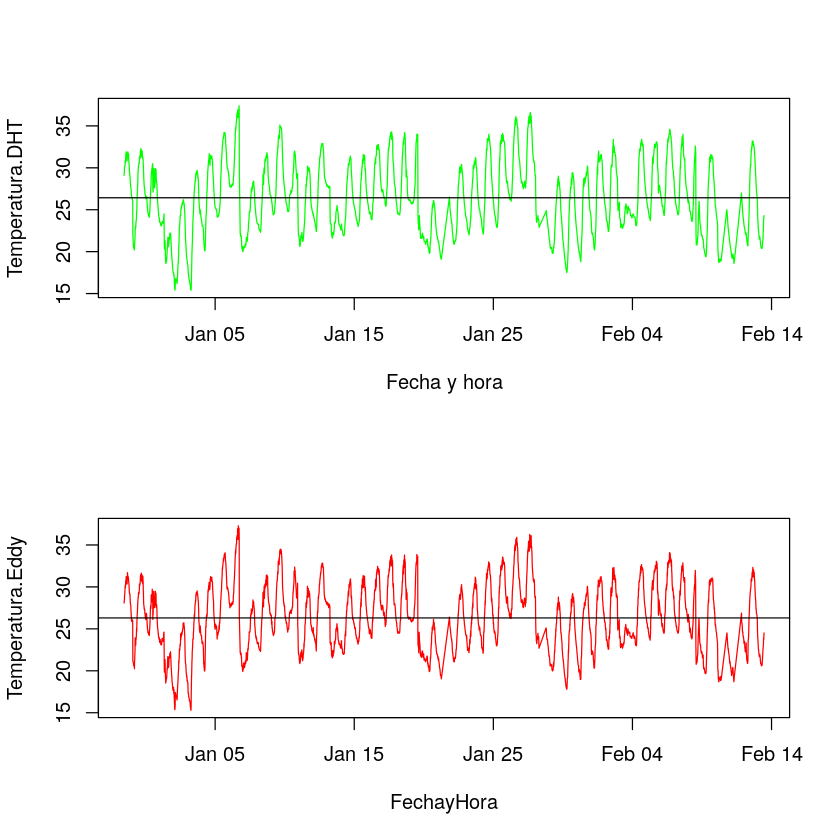

In [32]:
par(mfrow = c(2,1))
plot(Temperatura.DHT~FechayHora, col="green", xlab="Fecha y hora", type="l")
abline(h = mean(Temperatura.DHT), v = 0,col='black')
plot(FechayHora, Temperatura.Eddy,col="red", type="lines")
abline(h = mean(Temperatura.Eddy), v = 0,col='black')

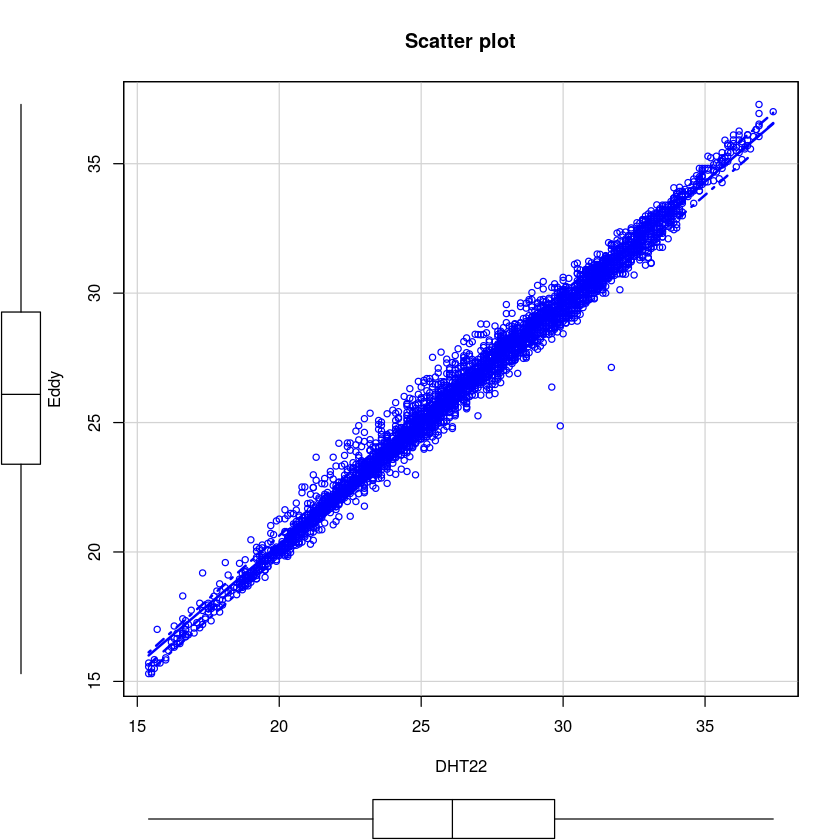

In [23]:
scatterplot(Temperatura.Eddy ~ Temperatura.DHT, data=datosHT, xlab="DHT22", ylab="Eddy", main="Scatter plot") 

In [25]:
modeloEddy = lm(Temperatura.Eddy ~ FechayHora)
summary(modeloEddy)


Call:
lm(formula = Temperatura.Eddy ~ FechayHora)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.9520  -2.8749  -0.2084   2.9819  11.0281 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -2.177e+01  7.673e+01  -0.284    0.777
FechayHora   3.382e-08  5.397e-08   0.627    0.531

Residual standard error: 4 on 4216 degrees of freedom
Multiple R-squared:  9.311e-05,	Adjusted R-squared:  -0.0001441 
F-statistic: 0.3926 on 1 and 4216 DF,  p-value: 0.531


In [37]:
modeloDHT = lm(Temperatura.DHT ~ FechayHora)
summary(modeloDHT)


Call:
lm(formula = Temperatura.DHT ~ FechayHora)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.9893  -3.1098  -0.3549   3.3071  11.0026 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -1.227e+01  8.167e+01  -0.150    0.881
FechayHora   2.722e-08  5.744e-08   0.474    0.636

Residual standard error: 4.258 on 4216 degrees of freedom
Multiple R-squared:  5.325e-05,	Adjusted R-squared:  -0.0001839 
F-statistic: 0.2245 on 1 and 4216 DF,  p-value: 0.6356


- Vemos que en ambos modelos lineales la pendiente es practicamente nula, por tanto trabajamos SOLO con la media


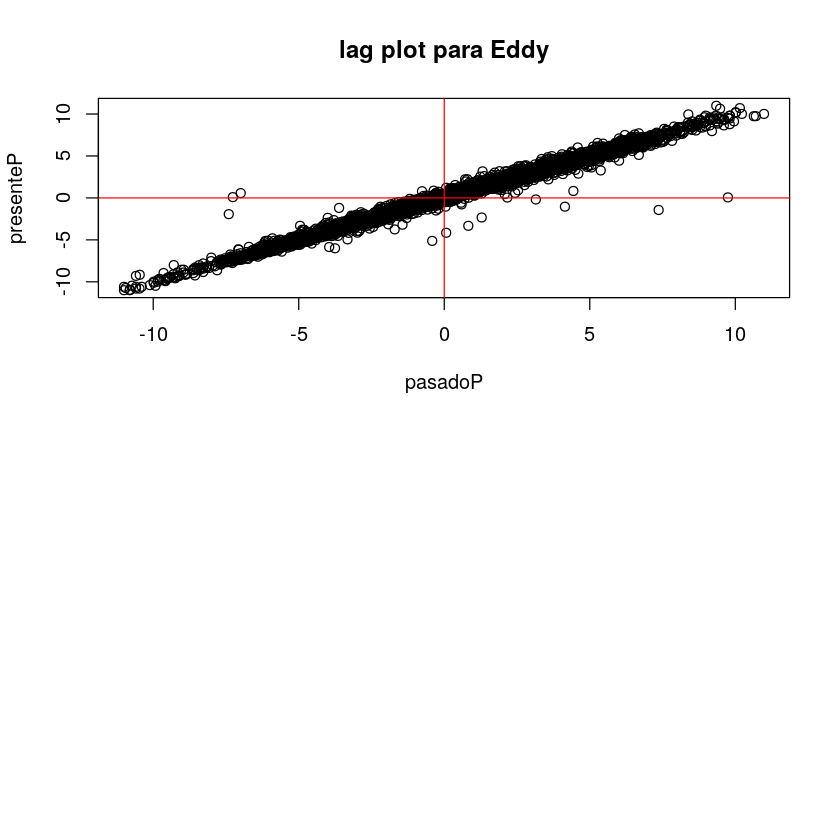

In [39]:
nP = length(Temperatura.Eddy)
par(mfrow = c(2,1))
resP = Temperatura.Eddy-mean(Temperatura.Eddy)
pasadoP = resP[-nP]
presenteP = resP[-1]
plot(presenteP~pasadoP, main = 'lag plot para Eddy')
# agrego los ejes
abline(h = 0, v = 0,col='red')

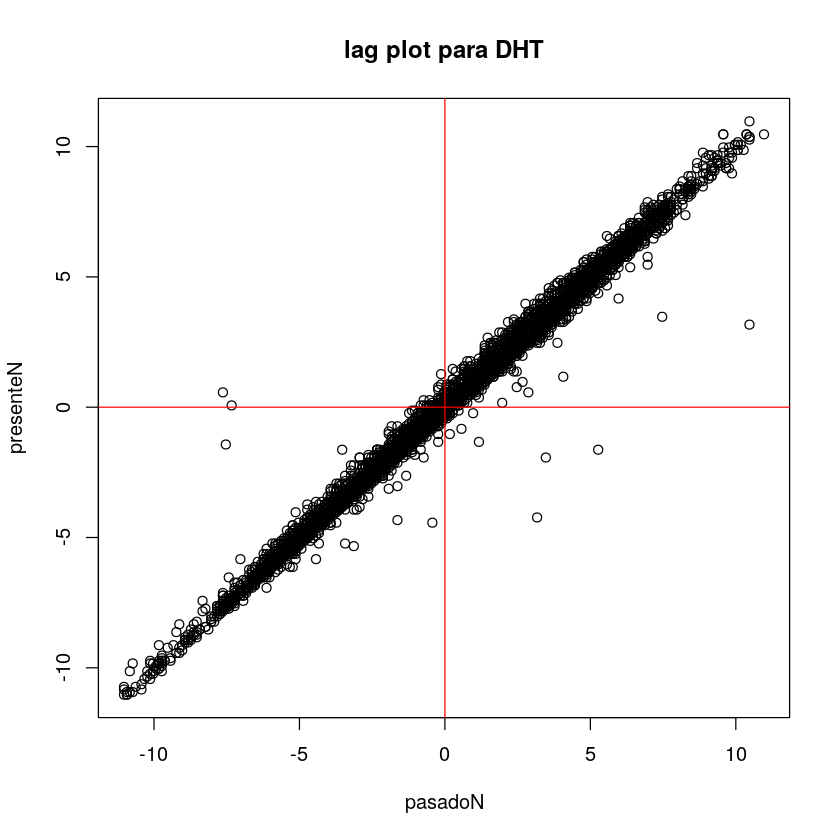

In [40]:
nN = length(Temperatura.DHT)
resN = Temperatura.DHT-mean(Temperatura.DHT)
pasadoN = resN[-nN]
presenteN = resN[-1]
plot(presenteN~pasadoN, main = 'lag plot para DHT')
# agrego los ejes
abline(h = 0, v = 0,col='red')

In [41]:
# d)
c1P = sum(presenteP*pasadoP)/(nP-1)
c0P = sum(resP^2)/(nP-1)
c1N = sum(presenteN*pasadoN)/(nN-1)
c0N = sum(resN^2)/(nN-1)
# los estimadores combinados
c1 = ((nP-1)*c1P + (nN-1)*c1N)/(nP+nN-2)
c0 = ((nP-1)*c0P + (nN-1)*c0N)/(nP+nN-2)
# estimacion del alpha:
(r1 = c1/c0)

[1] 0.9934054

In [42]:
sp = sqrt(((nP-1)*var(Temperatura.Eddy) + (nN-1)*var(Temperatura.DHT))/(nP+nN-2))
correc = sqrt((1+r1)/(1-r1))
# error estandar corregido:
SE = correc*sp*sqrt(1/nP + 1/nN)
dif = mean(Temperatura.Eddy) - mean(Temperatura.DHT)
z = qnorm(1-0.05/2)
c(dif-z*SE, dif+z*SE)
# como el itervalo de confianza para la diferencia de medias contiene al
# cero, no tenemos evidencia suficiente para afirmar que las medias
# son distintas

[1] -3.192175  2.937841

In [44]:
# f) Que pasa si no tengo en cuenta la correlacion??
t.test(Temperatura.Eddy,Temperatura.DHT,var.equal=TRUE)
SE = sp*sqrt(1/nP + 1/nN)
t=qt(1-.05/2,nP+nN-2)
c(dif-t*SE, dif+t*SE)
# IC: (-0.303482438814808 0.0491486313231033)
# este intervalo tiene menor longitud que el intervalo corregido por correlacion
# esto se debe a que el factor de ajuste es 
# 2.149401, el cual es > 1, por lo que el IC del item anterior tiene
# mayor longitud


	Two Sample t-test

data:  Temperatura.Eddy and Temperatura.DHT
t = -1.4138, df = 8434, p-value = 0.1575
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.30348244  0.04914863
sample estimates:
mean of x mean of y 
 26.30372  26.43089 


[1] -0.30348244  0.04914863

## Temperatura del suelo

Resumen: En este caso se contrasta la temperatura de suelo registrada por el sensor HydraProbeII de Stevens con la medida por el sensor DS18B20. 

In [100]:
datosTS = read.csv("datos/stevens_fc_ds/ds_vs_stevensTiempo.csv", sep=",")
#str(datosTS)
head(datosTS)
attach(datosTS)

tiempo,Stevens,DS18B20
0.15,25.6,26.00
0.30,26.2,26.06
0.45,26.2,26.00
0.60,26.2,26.00
0.75,26.2,26.00
0.90,26.2,26.00


The following objects are masked from datosTS (pos = 13):

    DS18B20, Stevens, tiempo

The following objects are masked from datosTS (pos = 14):

    DS18B20, Stevens, tiempo



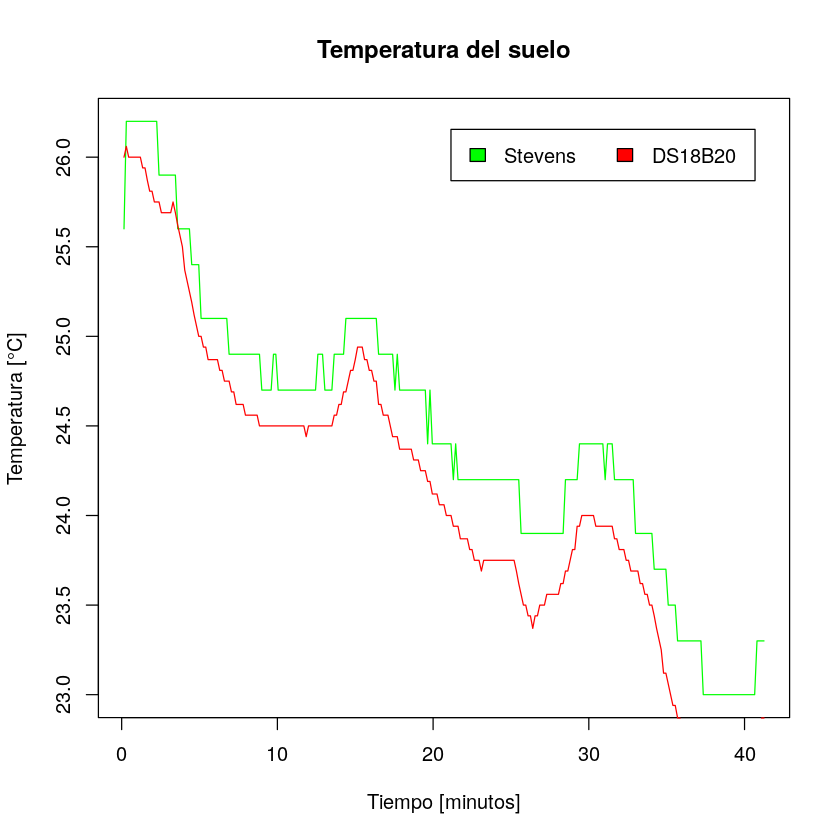

In [101]:
plot(tiempo, Stevens, col="green", main="Temperatura del suelo", xlab="Tiempo [minutos]", ylab="Temperatura [°C]", type="lines")
lines(tiempo, DS18B20, col="red")
legend("topright", inset=.05, c("Stevens","DS18B20"), fill=c("green","red"), horiz=TRUE)

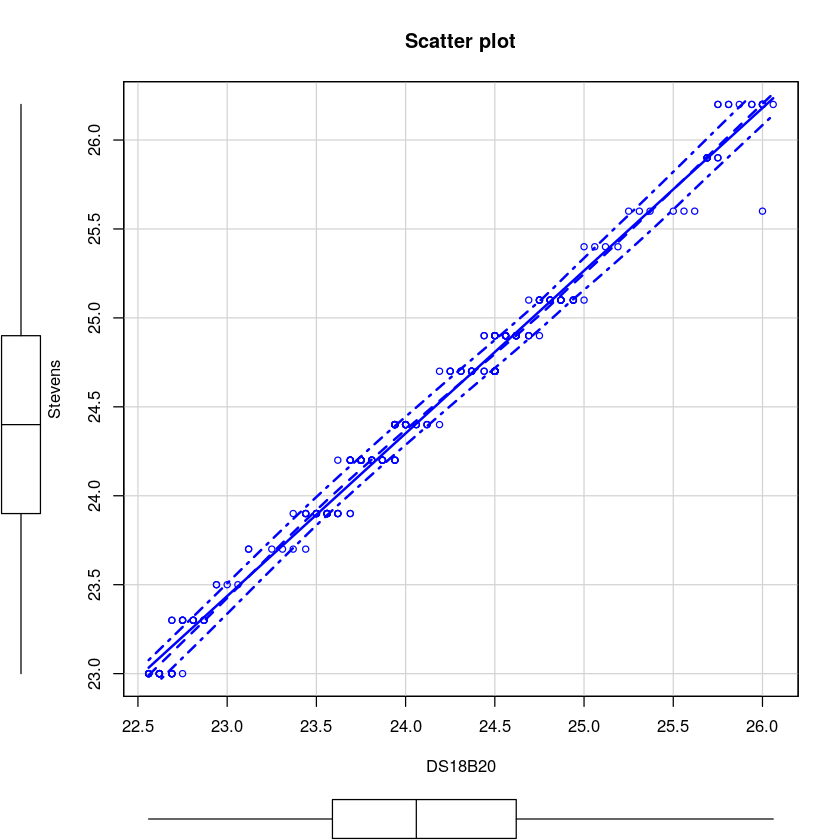

In [102]:
scatterplot(Stevens ~ DS18B20, data=datosTS, xlab="DS18B20", ylab="Stevens", main="Scatter plot") 

In [104]:
modeloS = lm(Stevens ~ tiempo)
summary(modeloS)


Call:
lm(formula = Stevens ~ tiempo)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.49826 -0.24247 -0.05543  0.24117  0.61797 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 25.764746   0.035977  716.14   <2e-16 ***
tiempo      -0.062943   0.001507  -41.78   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2975 on 273 degrees of freedom
Multiple R-squared:  0.8648,	Adjusted R-squared:  0.8643 
F-statistic:  1746 on 1 and 273 DF,  p-value: < 2.2e-16


In [105]:
modeloD = lm(DS18B20 ~ tiempo)
summary(modeloD)


Call:
lm(formula = DS18B20 ~ tiempo)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.44412 -0.24639 -0.08226  0.27158  0.56614 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 25.554457   0.035628   717.3   <2e-16 ***
tiempo      -0.069225   0.001492   -46.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2946 on 273 degrees of freedom
Multiple R-squared:  0.8875,	Adjusted R-squared:  0.8871 
F-statistic:  2153 on 1 and 273 DF,  p-value: < 2.2e-16


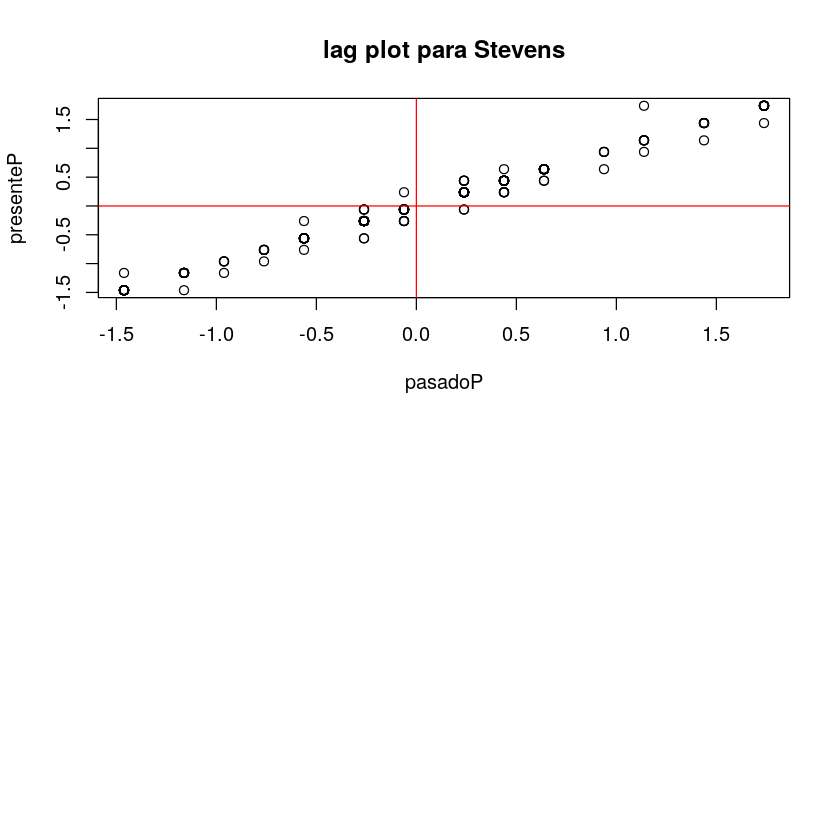

In [106]:
nP = length(Stevens)
par(mfrow = c(2,1))
resP = Stevens-mean(Stevens)
pasadoP = resP[-nP]
presenteP = resP[-1]
plot(presenteP~pasadoP, main = 'lag plot para Stevens')
# agrego los ejes
abline(h = 0, v = 0,col='red')

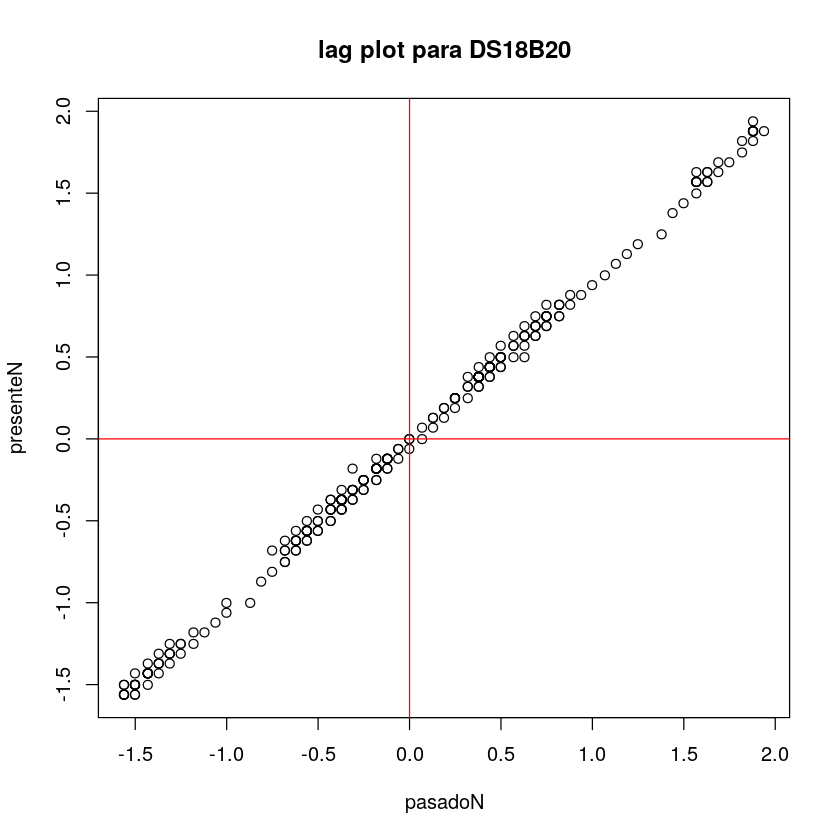

In [107]:
nN = length(DS18B20)
resN = DS18B20-mean(DS18B20)
pasadoN = resN[-nN]
presenteN = resN[-1]
plot(presenteN~pasadoN, main = 'lag plot para DS18B20')
# agrego los ejes
abline(h = 0, v = 0,col='red')

In [108]:
# d)
c1P = sum(presenteP*pasadoP)/(nP-1)
c0P = sum(resP^2)/(nP-1)
c1N = sum(presenteN*pasadoN)/(nN-1)
c0N = sum(resN^2)/(nN-1)
# los estimadores combinados
c1 = ((nP-1)*c1P + (nN-1)*c1N)/(nP+nN-2)
c0 = ((nP-1)*c0P + (nN-1)*c0N)/(nP+nN-2)
# estimacion del alpha:
(r1 = c1/c0)

[1] 0.9865742

In [109]:
sp = sqrt(((nP-1)*var(Stevens) + (nN-1)*var(DS18B20))/(nP+nN-2))
correc = sqrt((1+r1)/(1-r1))
# error estandar corregido:
SE = correc*sp*sqrt(1/nP + 1/nN)
dif = mean(Stevens) - mean(DS18B20)
z = qnorm(1-0.05/2)
c(dif-z*SE, dif+z*SE)
# como el itervalo de confianza para la diferencia de medias contiene al
# cero, no tenemos evidencia suficiente para afirmar que las medias
# son distintas

[1] -1.373154  2.053809

In [110]:
# f) Que pasa si no tengo en cuenta la correlacion??
t.test(Stevens,DS18B20,var.equal=TRUE)
SE = sp*sqrt(1/nP + 1/nN)
t = qt(1-.05/2,nP+nN-2)
c(dif-t*SE, dif+t*SE)
# IC: (-0.303482438814808 0.0491486313231033)
# este intervalo tiene menor longitud que el intervalo corregido por correlacion
# esto se debe a que el factor de ajuste es 
# 2.149401, el cual es > 1, por lo que el IC del item anterior tiene
# mayor longitud


	Two Sample t-test

data:  Stevens and DS18B20
t = 4.7353, df = 548, p-value = 2.789e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1991526 0.4815020
sample estimates:
mean of x mean of y 
 24.46182  24.12149 


[1] 0.1991526 0.4815020


<div class="alert alert-block alert-warning">
<b>Example:</b> Use yellow boxes for examples that are not 
inside code cells, or use for mathematical formulas if needed.
</div>

<div class="alert alert-block alert-success">
<b>Up to you:</b> Use green boxes sparingly, and only for some specific 
purpose that the other boxes can't cover. For example, if you have a lot 
of related content to link to, maybe you decide to use green boxes for 
related links from each section of a notebook.
</div>

<div class="alert alert-block alert-danger">
<b>Just don't:</b> In general, avoid the red boxes. These should only be
used for actions that might cause data loss or another major issue.
</div>

<div class="alert alert-block alert-info">
<b>-</b> Tenemos datos registrados en el tiempo: no son independientes
</div>